### KNN: Librería clasificadora de los Kvecinos usando Scikit Learn

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data[:, :2] # extraemos solo 2 características sepal length y sepal width (0 y 1)
y = iris.target

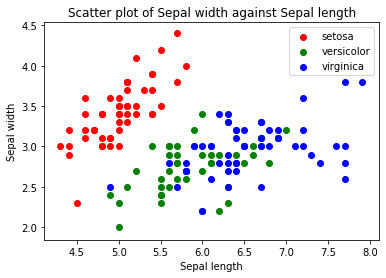

In [7]:
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target) # 0 de sepal length | 1 de sepal width
    
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

### Explorando distintos valores de k

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
k = 1

knn = KNeighborsClassifier(n_neighbors=k)

In [10]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
# minimo y maximo del primer feature (feature 0: sepal length)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1  # - 1 y +1 porque estos parámetros servirán de limites pa graf

In [12]:
#minimo y máximo del segundo feature (feature 1: sepald width)
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

In [13]:
# tamaño de la malla, paso
h = (x_max/x_min)/100

In [14]:
# creamos una malla

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), 
                    np.arange(y_min, y_max, h))

In [15]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # predicción

In [16]:
np.unique(Z)

array([0, 1, 2])

(array([0, 1, 2]), array([50, 51, 49]))


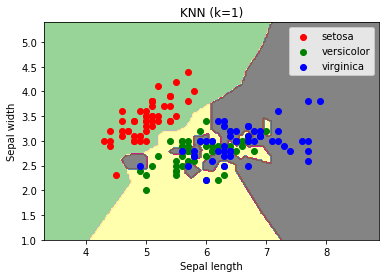

In [13]:
# Dibujamos los contornos
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

# Ahora dibujamos los puntos
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)


predictions = knn.predict(X)

# cantidad de clases según la predicción
print(np.unique(predictions, return_counts=True))



Esta clasificación se hizo con k = 1.

Imaginemos el caso de un valor atípico cerca de un punto cualquiera, al tener un k = 1, nuestro punto evaluado se guiará tan solo de éste valor atípico que por mala suerte se encuentra cerca de él lo que causará a una mala clasificación, en estos casos de valores k tan pequeños se dice que tenemos un **sobreajuste**

### Recordatorio

Hablamos de **overfitting** en el aprendizaje automático cuando se tiene un modelo ajustado de manera muy exacta para los datos de entrenamiento tomando también el error único que tiene este conjunto de entrenamiento, produciendo que en otro conjunto de datos con distintos errores se produzca malas predicciones por el **sobreajuste** u **overfitting**. Por otro lado hablamos de **underfitting** cuando el modelo no se ajustarón para nada bien con los datos que tenemos dejando así muy poca exactitud.

![](typesOfFit.png)

Aquí tenemos el ejemplo usado anteriormente pero con distintos valores de k.

![](diferentsKForKnn.png)

### Cross-Validation

Cuando tenemos tan solo 1 set de entrenamiento de un set completo, podemos caer en el caso donde hemos agarrado talvez más datos outliers o en forma general podemos decir que no tenemos la certeza de que éste set de entrenamiento agarrado sea justo, es entonces que usamos la técnica de **cross-validation** o **validación cruzada** que funciona de la siguiente manera:

   * De todo el conjunto de datos vamos a partir en k partes.
   * 1 parte de estas k partes será usado como set de test.
   * Los k-1 restantes partes serán usado como entrenamiento
   
A éste tipo de validación curzada se le conoce como k-crossvalidation.

![](crossValidationGeneral.png)

Al final de cada corrida (**run**) calculamos un score cualquiera para luego tener al final de todas las corridas scores diferentes para cada corrida lo que nos ayudará a obtener un promedio de éste score, dando asi una mejor visión de como está funcionando nuestro score en promedio.

**Nota:** Cross-validatión no nos ayudará a mejorar nuestro modelo, es solo para chckear el comportamiento de un score de una manera más *justa*.

### Ajuste de parámetro K

Ahora ponemos en práctica lo mencionado arriba.

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cv_scores = []

X = iris.data[:, :4]
y = iris.target

folds = 10


ks = list(range(1,int(len(X) * ((folds - 1)/folds))))


ks = [k for k in ks if k % 3 != 0]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
#---performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy') # scoring es la métrica que deseamos checar.
    mean = scores.mean()
    cv_scores.append(mean)
print('k: ' +str(k) ,'mean: '+ str(mean))

k: 134 mean: 0.5533333333333333


In [16]:
# List of ks values
print(ks)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134]


In [17]:
# List of cv_scores
print(cv_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9733333333333334, 0.9666666666666666, 0.96, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9400000000000001, 0.9333333333333333, 0.9333333333333333, 0.9400000000000001, 0.9266666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9066666666666666, 0.9133333333333334, 0.9200000000000002, 0.9199999999999999, 0.9066666666666666, 0.9, 0.9, 0.8866666666666667, 0.8800000000000001, 0.8866666666666667, 0.8866666666666667, 0.8933333333333333, 0.8866666666666667, 0.8800000000000001, 0.8866666666666667, 0.886666666666666

### Buscando el óptimo K

In [18]:
MSE = [1 - x for x in cv_scores]

optimal_k = ks[MSE.index(min(MSE))]
print(f"El número óptimo de vecinos es: {optimal_k}")

El número óptimo de vecinos es: 13


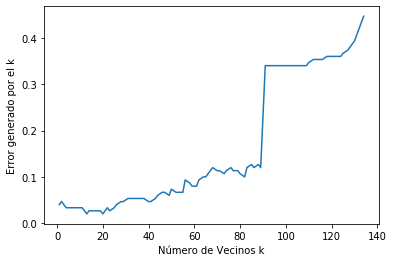

In [19]:
# -- Plot de los parámetros

plt.plot(ks,MSE)
plt.xlabel('Número de Vecinos k')
plt.ylabel('Error generado por el k')
plt.show()

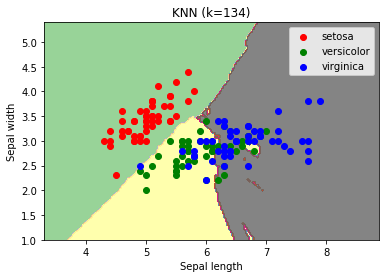

In [20]:
X = iris.data[:, :2] # extraemos solo 2 características sepal length y sepal width (0 y 1)
y = iris.target

# draw all
knn = KNeighborsClassifier(n_neighbors= optimal_k)

knn.fit(X,y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # predicción

# minimo y maximo del primer feature (feature 0: sepal length)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1  # - 1 y +1 porque estos parámetros servirán de limites pa graf
#minimo y máximo del segundo feature (feature 1: sepald width)
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

# tamaño de la malla, paso
h = (x_max/x_min)/100

# creamos una malla

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), 
                    np.arange(y_min, y_max, h))

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

# Ahora dibujamos los puntos
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

![](knnmaxvalue.png)

![](knnmaxvalue.png)

### Resumen

De los 4 algoritmos vistos hasta ahora, el algoritmo KNN es considerado uno de los más sencillos. En éste capitulo, se aprendió como trabajo el algoritmo KNN y como hallar el valor óptimo del k.